In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Overview Data

In [2]:
# Read data from file csv

data = pd.read_csv("Ecommerce_Purchases.csv")

In [3]:
data.head()

Address    Lot AM or PM  \
0  16629 Pace Camp Apt. 448\nAlexisborough, NE 77...  46 in       PM   
1  9374 Jasmine Spurs Suite 508\nSouth John, TN 8...  28 rn       PM   
2                   Unit 0065 Box 5052\nDPO AP 27450  94 vE       PM   
3              7780 Julia Fords\nNew Stacy, WA 45798  36 vm       PM   
4  23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...  20 IE       AM   

                                        Browser Info  \
0  Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...   
1  Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...   
3  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...   
4  Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...   

                           Company       Credit Card CC Exp Date  \
0                  Martinez-Herman  6011929061123406       02/20   
1  Fletcher, Richards and Whitaker  3337758169645356       11/18   
2       Simpson, Williams and Pham      675957666125       08/19   
3  Williams, Marshall and Buchanan  6011578504430710       02/24   
4        Brown, Watson and Andrews  6011456623207998       10/25   

   CC Security Code                  CC Provider  \
0               900                 JCB 16 digit   
1               561                   Mastercard   
2               699                 JCB 16 digit   
3               384                     Discover   
4               678  Diners Club / Carte Blanche   

                            Email                                     Job  \
0               pdunlap@yahoo.com  Scientist, product/process development   
1              anthony41@reed.com                       Drilling engineer   
2  amymiller@morales-harrison.com                Customer service manager   
3     brent16@olson-robinson.info                       Drilling engineer   
4     christopherwright@gmail.com                             Fine artist   

        IP Address Language  Purchase Price  
0  149.146.147.205       el           98.14  
1     15.160.41.51       fr           70.73  
2   132.207.160.22       de            0.95  
3     30.250.74.19       es           78.04  
4     24.140.33.94       es           77.82

In [4]:
# Check data types of columns

data.dtypes

Address              object
Lot                  object
AM or PM             object
Browser Info         object
Company              object
Credit Card           int64
CC Exp Date          object
CC Security Code      int64
CC Provider          object
Email                object
Job                  object
IP Address           object
Language             object
Purchase Price      float64
dtype: object

### Data about the customer's purchase history according to a number of personal information related such as address, time purchase, browser info used to purchase, company, credit card, email, job,...


### 1. Find the relationship between top 5 Job designation and total Purchase amount

In [5]:
# Check columns Job and count number of jobs

data['Job'].value_counts()

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
                                 ..
Prison officer                    7
Editor, film/video                6
Actuary                           6
Information systems manager       5
Investment analyst                5
Name: Job, Length: 623, dtype: int64

In [6]:
# Check columns Purchase Price and give some descriptive

data['Purchase Price'].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

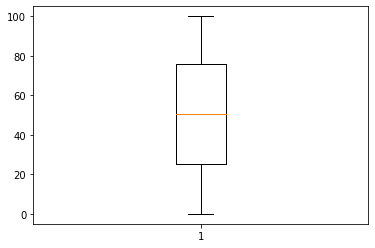

In [7]:
# Plot distribution of columns Purchase Price

plt.boxplot(data["Purchase Price"])
plt.show()

In [8]:
# Get dataframe for question 1

df_1 = data.loc[:, ['Job','Purchase Price']]
df_1

Job  Purchase Price
0     Scientist, product/process development           98.14
1                          Drilling engineer           70.73
2                   Customer service manager            0.95
3                          Drilling engineer           78.04
4                                Fine artist           77.82
...                                      ...             ...
9995                              Printmaker           82.21
9996                         Energy engineer           25.63
9997                      Veterinary surgeon           83.98
9998                Local government officer           38.84
9999                  Embryologist, clinical           67.59

[10000 rows x 2 columns]

In [9]:
# Get dataframe group by Job

df_1_groupby = df_1.groupby('Job').agg(["sum","count"])
df_1_groupby

Purchase Price      
                                            sum count
Job                                                  
Academic librarian                       527.47    11
Accommodation manager                    629.65    17
Accountant, chartered                   1051.31    20
Accountant, chartered certified         1043.01    18
Accountant, chartered management        1036.24    15
...                                         ...   ...
Water quality scientist                  837.47    18
Web designer                            1195.29    20
Wellsite geologist                      1231.42    24
Writer                                   448.63    10
Youth worker                             729.24    18

[623 rows x 2 columns]

In [10]:
# Check columns of df_1_groupby

df_1_groupby.columns

MultiIndex([('Purchase Price',   'sum'),
            ('Purchase Price', 'count')],
           )

In [11]:
# top 5 job has most total purchase amount 

df_1_groupby.sort_values(by=('Purchase Price', 'sum'), ascending=False).head(5)

Purchase Price      
                                   sum count
Job                                         
Dietitian                      1605.30    26
Lawyer                         1603.85    30
Purchasing manager             1577.97    27
Therapist, art                 1526.31    25
Clinical cytogeneticist        1495.92    22

In [12]:
# 5 job has least total purchase amount

df_1_groupby.sort_values(by=('Purchase Price', 'sum'), ascending=True).head(5)

Purchase Price      
                                       sum count
Job                                             
Art gallery manager                 219.05     8
Marketing executive                 234.08     9
Information systems manager         241.42     5
Actuary                             262.72     6
Music therapist                     327.50     7

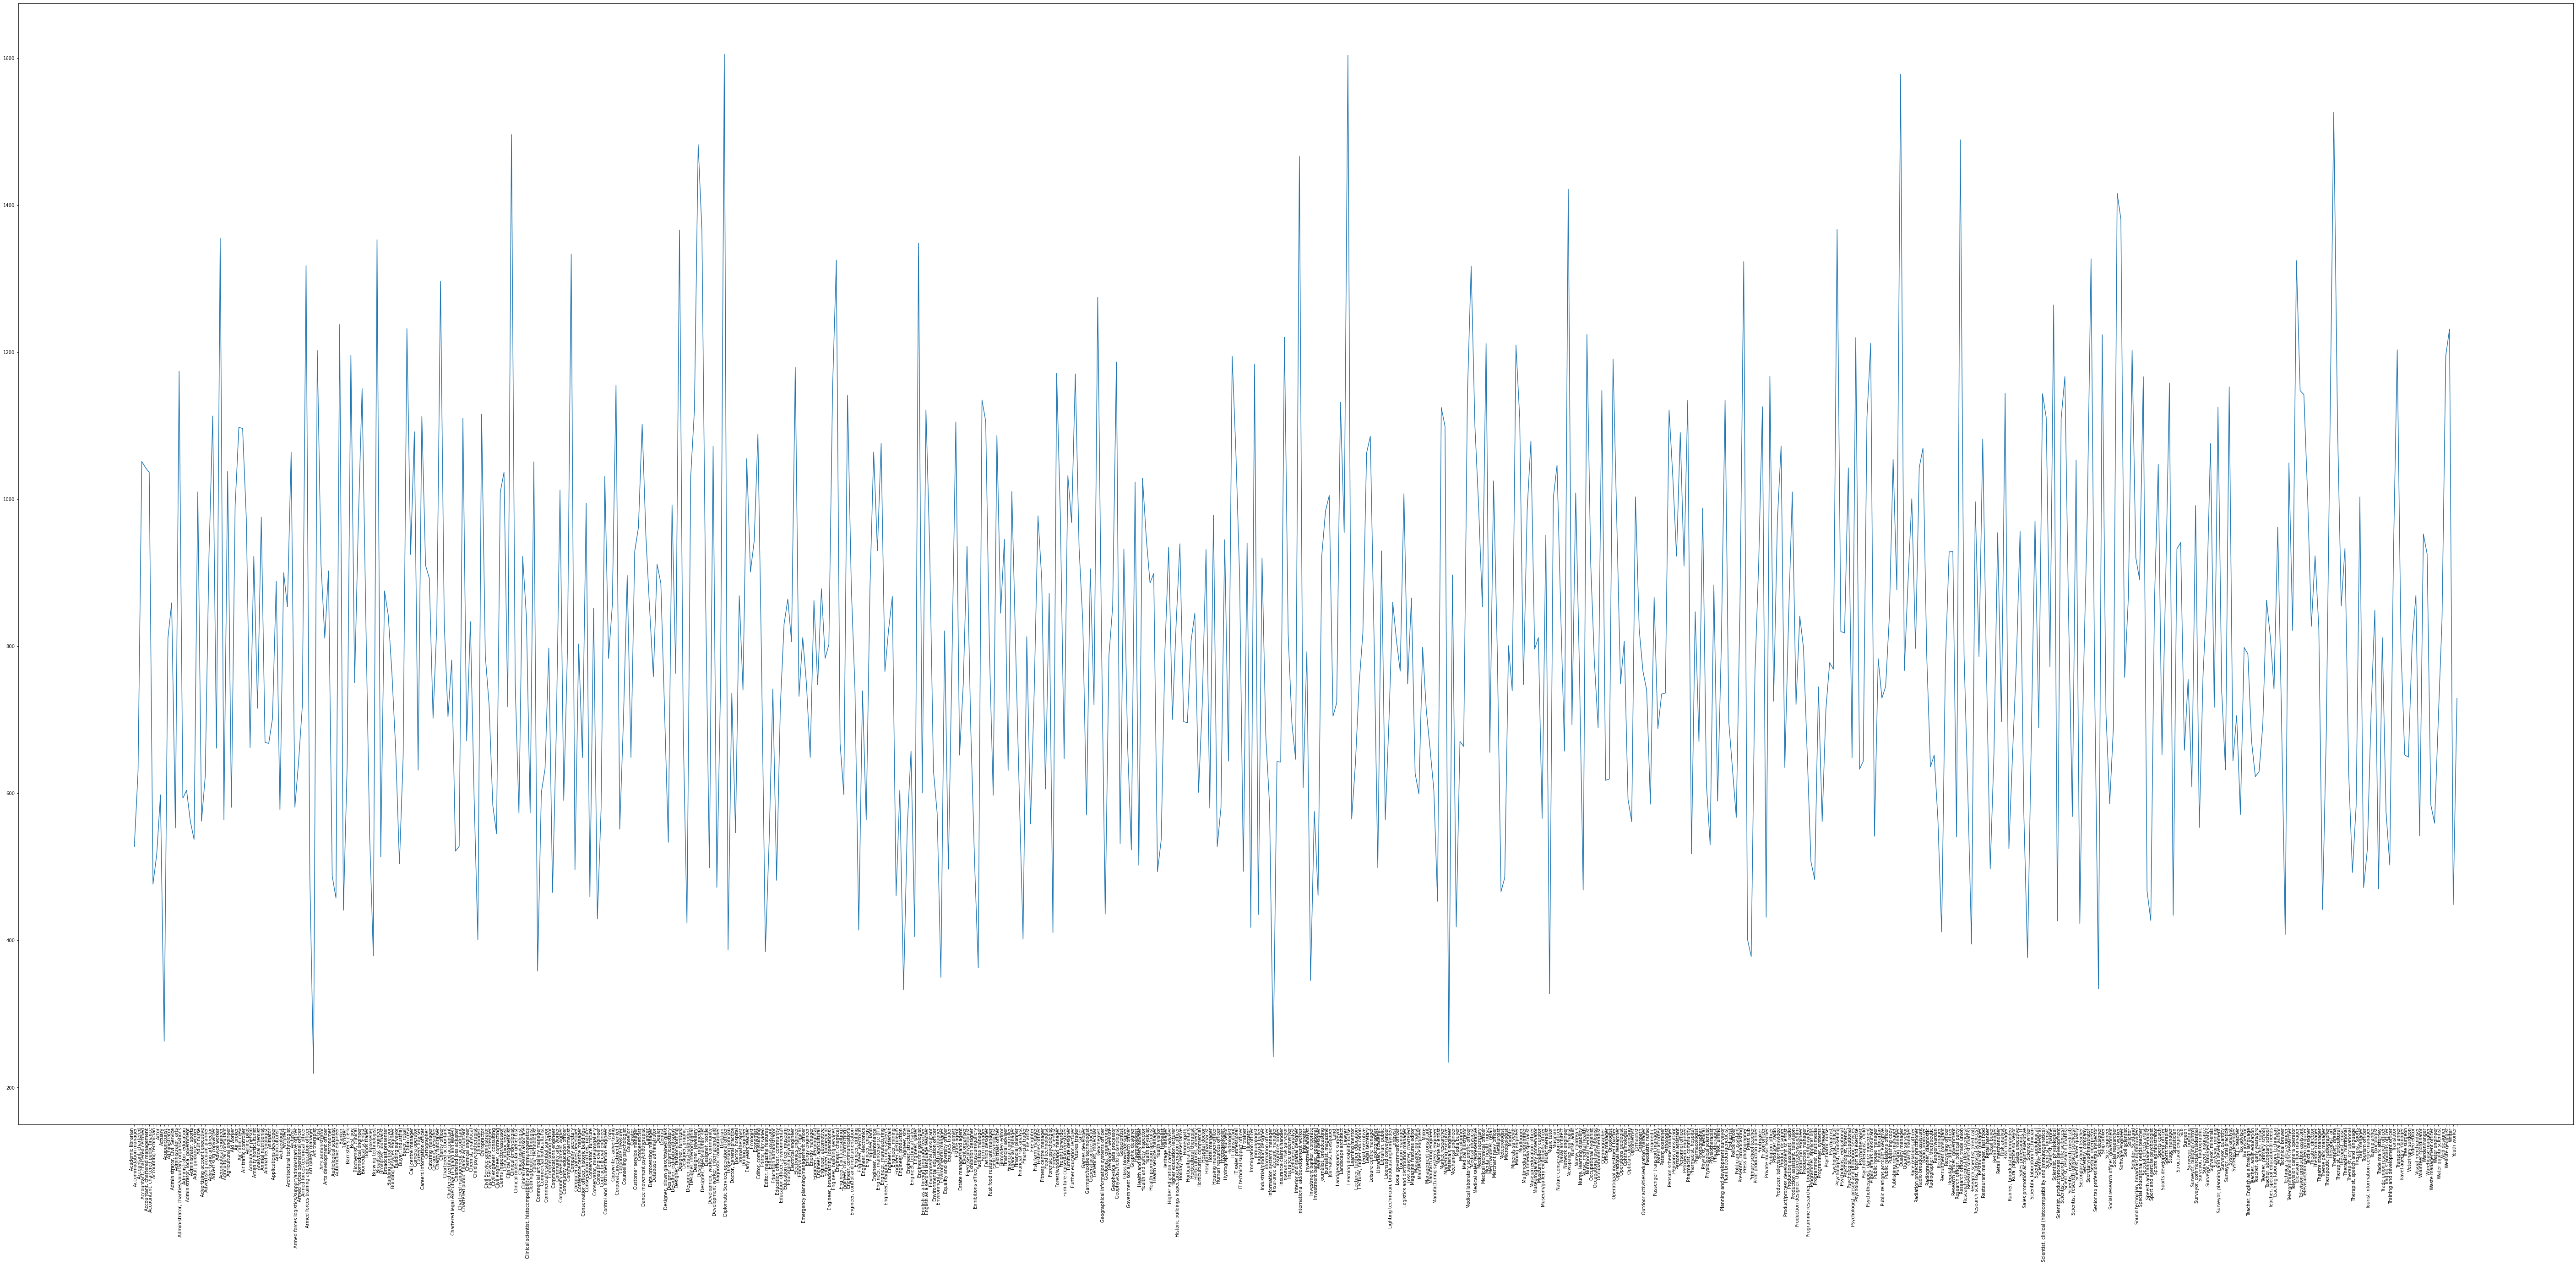

In [13]:
# Plot job by Purchase Price sum

x = df_1_groupby.index
y = df_1_groupby[('Purchase Price', 'sum')]

fig, ax = plt.subplots(figsize=(100,50))
fig.autofmt_xdate(rotation=90)

ax.plot(x, y)

### 2. Find the relationship between Job designation and mean Purchase amount

In [14]:
# Get dataframe for question 2

df_2 = df_1.groupby('Job').agg(["mean"])
df_2

Purchase Price
                                           mean
Job                                            
Academic librarian                    47.951818
Accommodation manager                 37.038235
Accountant, chartered                 52.565500
Accountant, chartered certified       57.945000
Accountant, chartered management      69.082667
...                                         ...
Water quality scientist               46.526111
Web designer                          59.764500
Wellsite geologist                    51.309167
Writer                                44.863000
Youth worker                          40.513333

[623 rows x 1 columns]

In [15]:
# top 5 job has most purchase amount mean

df_2.sort_values(by=('Purchase Price', 'mean'), ascending=False).head(5)

Purchase Price
                                           mean
Job                                            
Trade mark attorney                   73.802727
Translator                            70.777647
Investment analyst                    69.090000
Accountant, chartered management      69.082667
Designer, industrial/product          68.714667

In [16]:
# top 5 job has least purchase amount mean

df_2.sort_values(by=('Purchase Price', 'mean'), ascending=True).head(5)

Purchase Price
                                    mean
Job                                     
Marketing executive            26.008889
Art gallery manager            27.381250
Engineer, production           27.771667
Editor, magazine features      31.445294
Theatre stage manager          31.580000

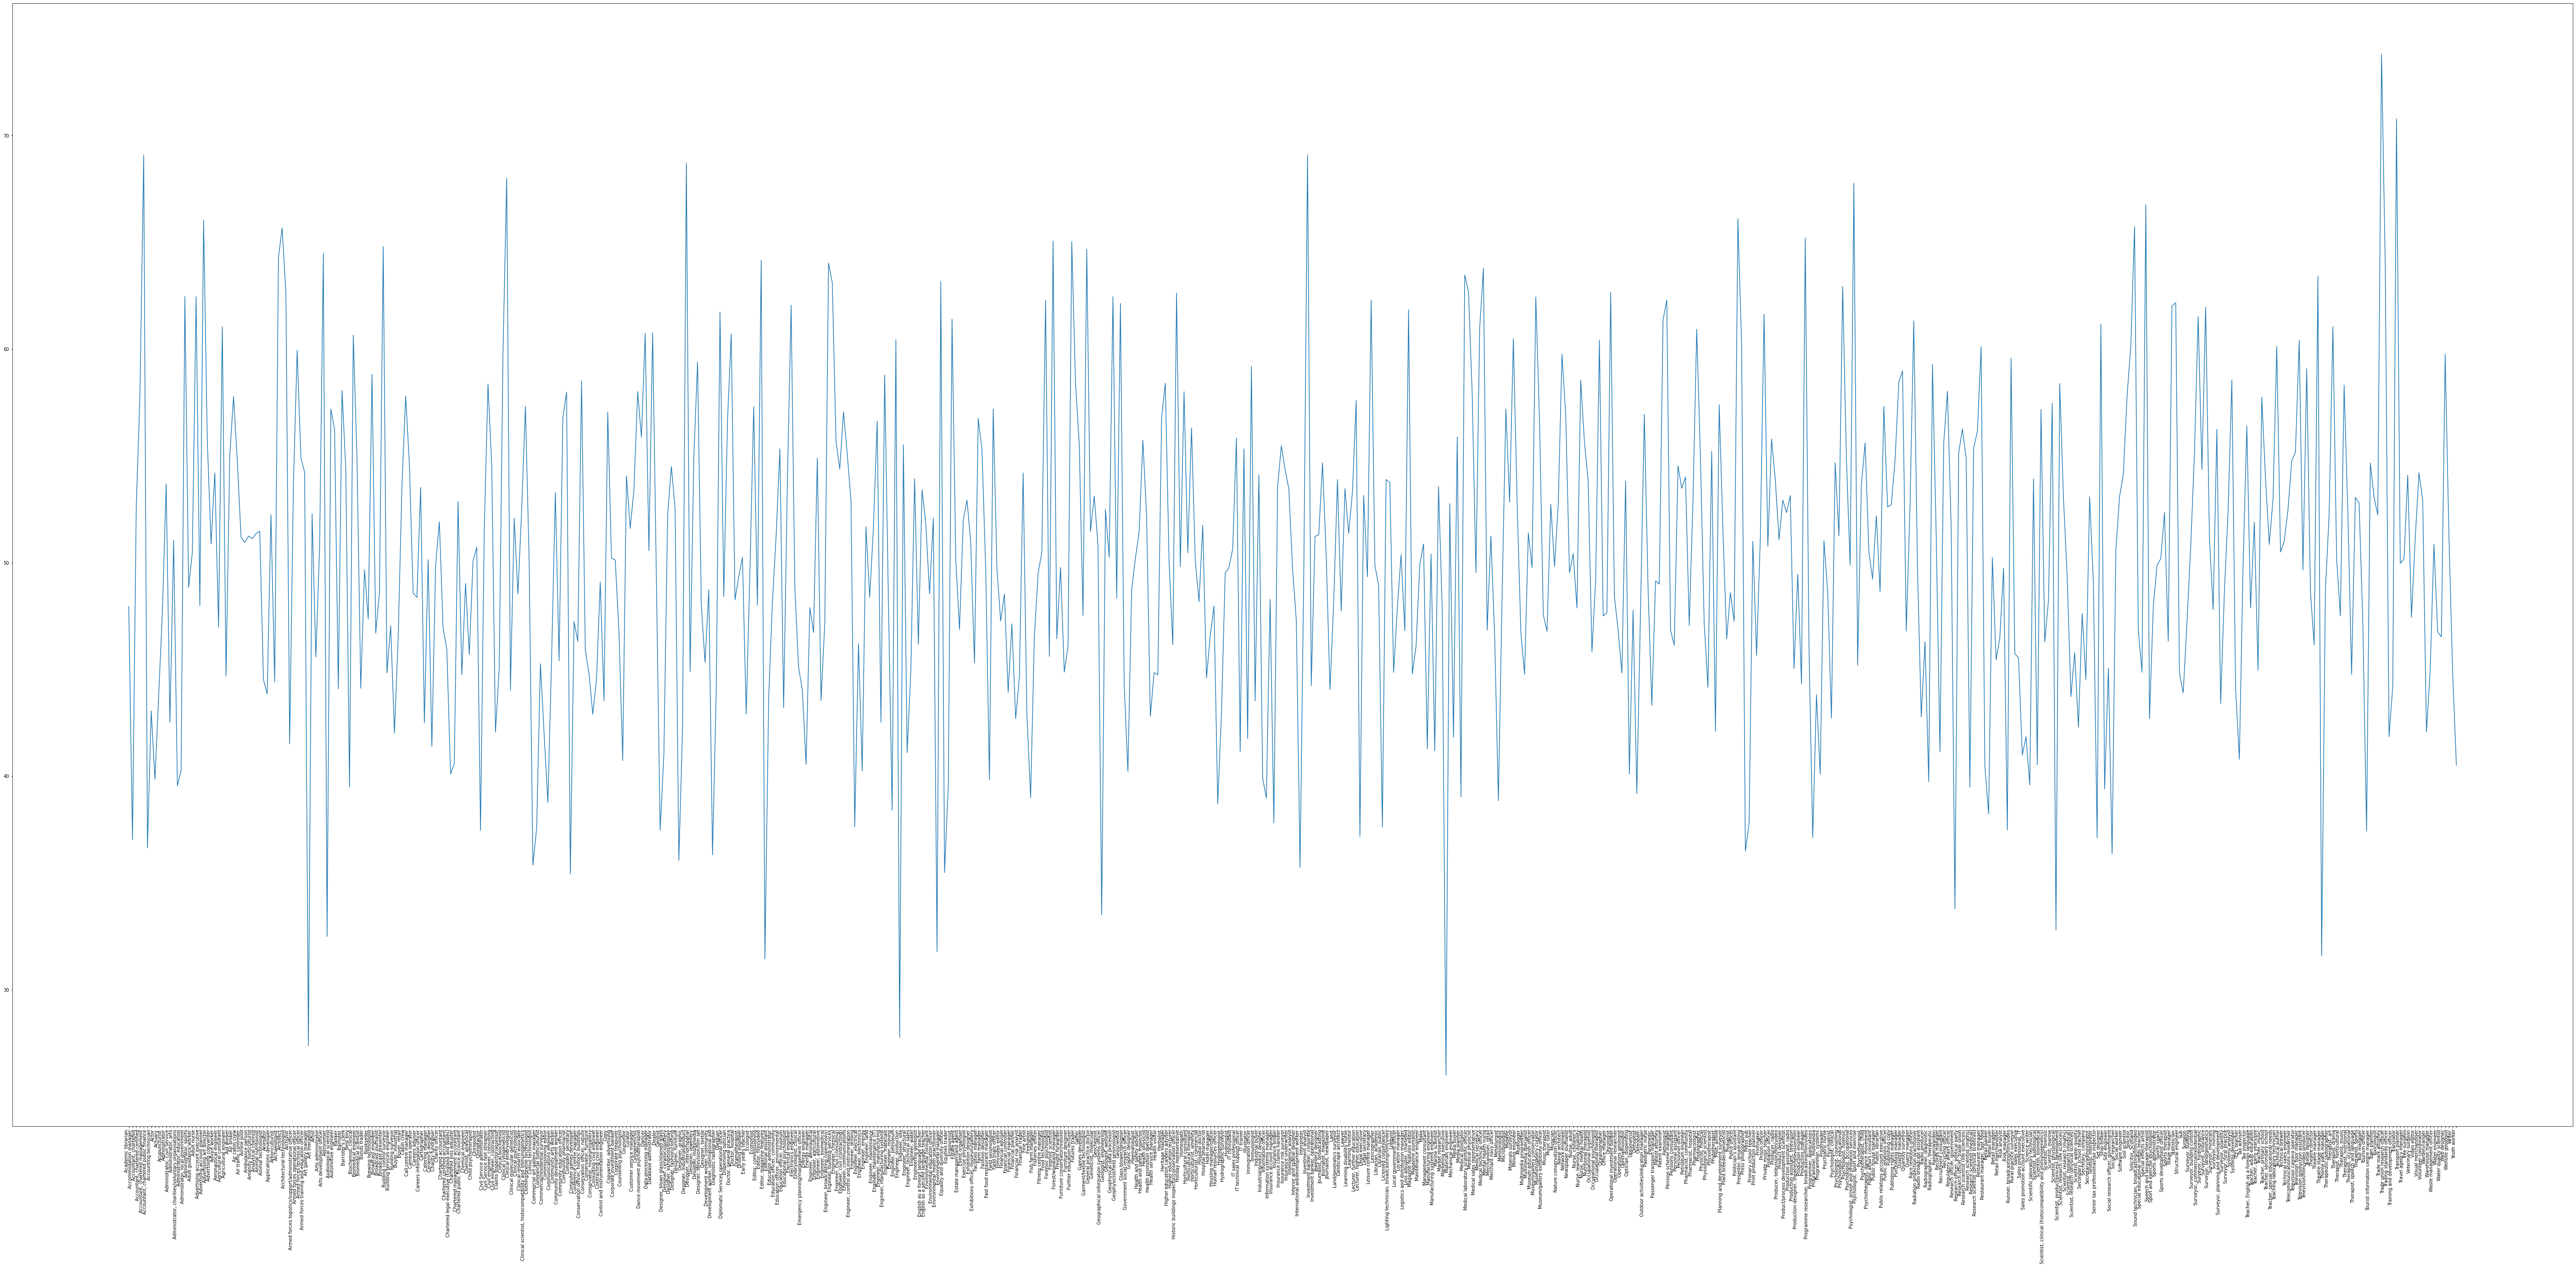

In [17]:
# Plot job by Purchase Price mean

x = df_2.index
y = df_2[('Purchase Price', 'mean')]

fig, ax = plt.subplots(figsize=(100,50))
fig.autofmt_xdate(rotation=90)

ax.plot(x, y)

### 3. How does purchase value depend on the Internet Browser used and Job (Profession) of the purchaser?

In [18]:
# Get dataframe for question 3 

df_3 = data.loc[:, ["Job","Browser Info","Purchase Price"]]
df_3

Job  \
0     Scientist, product/process development   
1                          Drilling engineer   
2                   Customer service manager   
3                          Drilling engineer   
4                                Fine artist   
...                                      ...   
9995                              Printmaker   
9996                         Energy engineer   
9997                      Veterinary surgeon   
9998                Local government officer   
9999                  Embryologist, clinical   

                                           Browser Info  Purchase Price  
0     Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...           98.14  
1     Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...           70.73  
2     Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...            0.95  
3     Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...           78.04  
4     Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...           77.82  
...                                                 ...             ...  
9995  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...           82.21  
9996  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...           25.63  
9997  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...           83.98  
9998  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...           38.84  
9999  Mozilla/5.0 (X11; Linux i686; rv:1.9.5.20) Gec...           67.59  

[10000 rows x 3 columns]

In [19]:
# Extract main browser from Browser Info

df_3['Browser Info'] = df_3["Browser Info"].str.split(pat='/')
df_3['Browser Info'] = df_3["Browser Info"].apply(lambda row: row[0])

df_3

Job Browser Info  Purchase Price
0     Scientist, product/process development        Opera           98.14
1                          Drilling engineer        Opera           70.73
2                   Customer service manager      Mozilla            0.95
3                          Drilling engineer      Mozilla           78.04
4                                Fine artist        Opera           77.82
...                                      ...          ...             ...
9995                              Printmaker      Mozilla           82.21
9996                         Energy engineer      Mozilla           25.63
9997                      Veterinary surgeon      Mozilla           83.98
9998                Local government officer      Mozilla           38.84
9999                  Embryologist, clinical      Mozilla           67.59

[10000 rows x 3 columns]

In [20]:
# Check columns Browser Info new 

df_3["Browser Info"].value_counts()

Mozilla    7924
Opera      2076
Name: Browser Info, dtype: int64

In [21]:
# Top 10 has most purchase value by browser info and job

df_3.groupby(["Browser Info","Job"]).agg(["sum","count"]).sort_values(by=("Purchase Price","sum"), ascending=False).head(10)

Purchase Price      
                                                              sum count
Browser Info Job                                                       
Mozilla      Clinical cytogeneticist                      1408.50    20
             Research officer, political party            1399.46    25
             Dietitian                                    1272.72    21
             Engineer, water                              1234.88    23
             Armed forces technical officer               1218.30    22
             Social researcher                            1217.30    23
             Community pharmacist                         1211.37    20
             Medical laboratory scientific officer        1189.46    18
             Designer, fashion/clothing                   1186.43    21
             Advice worker                                1178.01    20

In [22]:
# Top 10 has least purchase value by browser info and job

df_3.groupby(["Browser Info","Job"]).agg(["sum","count"]).sort_values(by=("Purchase Price","sum"), ascending=True).head(10)

Purchase Price      
                                                           sum count
Browser Info Job                                                    
Opera        Building services engineer                   1.56     1
             Tourist information centre manager           2.21     2
             Commercial art gallery manager               2.90     1
             Lecturer, further education                  3.48     1
             Education administrator                      5.51     1
             Camera operator                              8.36     1
             Programmer, applications                     9.07     2
             Soil scientist                               9.45     1
             Production assistant, television             9.67     1
             Customer service manager                     9.72     1

In [23]:
# Top 10 has most purchase value mean by browser info and job

df_3.groupby(["Browser Info","Job"]).agg("mean").sort_values(by="Purchase Price", ascending=False).head(10)

Purchase Price
Browser Info Job                                               
Opera        Nurse, learning disability                  99.900
             Technical brewer                            98.240
             Designer, industrial/product                96.590
             Gaffer                                      95.755
             Archaeologist                               95.220
             Field seismologist                          94.500
             Product designer                            92.665
             Conference centre manager                   92.460
             Toxicologist                                91.750
             Public relations account executive          91.615

In [24]:
# Top 10 has least purchase value mean by browser info and job

df_3.groupby(["Browser Info","Job"]).agg("mean").sort_values(by="Purchase Price", ascending=True).head(10)

Purchase Price
Browser Info Job                                               
Opera        Tourist information centre manager           1.105
             Building services engineer                   1.560
             Commercial art gallery manager               2.900
             Lecturer, further education                  3.480
             Programmer, applications                     4.535
             Education administrator                      5.510
             Camera operator                              8.360
             Soil scientist                               9.450
             Production assistant, television             9.670
             Customer service manager                     9.720

In [25]:
# Unstack to view purchase prise mean by browser info and job

df_3.groupby(["Browser Info","Job"]).agg("mean").unstack()

Purchase Price                                              \
Job          Academic librarian Accommodation manager Accountant, chartered   
Browser Info                                                                  
Mozilla                  46.306             38.788182             56.820000   
Opera                    64.410             33.830000             42.638333   

                                                                               \
Job          Accountant, chartered certified Accountant, chartered management   
Browser Info                                                                    
Mozilla                                60.32                           65.284   
Opera                                  51.77                           76.680   

                                                                         \
Job          Accountant, chartered public finance Accounting technician   
Browser Info                                                              
Mozilla                                 41.065455                44.045   
Opera                                   12.350000                38.150   

                                               ...                        \
Job               Actor Actuary Acupuncturist  ... Volunteer coordinator   
Browser Info                                   ...                         
Mozilla       39.095000  44.332     48.125385  ...             48.210667   
Opera         42.916667  41.060     46.372500  ...             76.500000   

                                                                       \
Job          Warden/ranger Warehouse manager Waste management officer   
Browser Info                                                            
Mozilla             40.938         44.655833                   48.485   
Opera               53.445         48.410000                   74.500   

                                                                  \
Job          Water engineer Water quality scientist Web designer   
Browser Info                                                       
Mozilla              43.360               51.449231    62.527692   
Opera                68.875               33.726000    54.632857   

                                                     
Job          Wellsite geologist Writer Youth worker  
Browser Info                                         
Mozilla               49.675909  44.00       42.688  
Opera                 69.275000  52.63       29.640  

[2 rows x 623 columns]

### 4. What are the patterns, if any, on the purchases based on Location (State) and time of purchase (AM or PM)?

In [26]:
# Get dataframe for question 4

df4 = data.loc[:, ["Address", "AM or PM","Purchase Price"]]
df4

Address AM or PM  \
0     16629 Pace Camp Apt. 448\nAlexisborough, NE 77...       PM   
1     9374 Jasmine Spurs Suite 508\nSouth John, TN 8...       PM   
2                      Unit 0065 Box 5052\nDPO AP 27450       PM   
3                 7780 Julia Fords\nNew Stacy, WA 45798       PM   
4     23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...       AM   
...                                                 ...      ...   
9995      966 Castaneda Locks\nWest Juliafurt, CO 96415       PM   
9996  832 Curtis Dam Suite 785\nNorth Edwardburgh, T...       AM   
9997              Unit 4434 Box 6343\nDPO AE 28026-0283       AM   
9998               0096 English Rest\nRoystad, IA 12457       PM   
9999     40674 Barrett Stravenue\nGrimesville, WI 79682       AM   

      Purchase Price  
0              98.14  
1              70.73  
2               0.95  
3              78.04  
4              77.82  
...              ...  
9995           82.21  
9996           25.63  
9997           83.98  
9998           38.84  
9999           67.59  

[10000 rows x 3 columns]

In [27]:
# Create columns state from address

df4["State"] = df4["Address"].str.split("\n")
df4

Address AM or PM  \
0     16629 Pace Camp Apt. 448\nAlexisborough, NE 77...       PM   
1     9374 Jasmine Spurs Suite 508\nSouth John, TN 8...       PM   
2                      Unit 0065 Box 5052\nDPO AP 27450       PM   
3                 7780 Julia Fords\nNew Stacy, WA 45798       PM   
4     23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...       AM   
...                                                 ...      ...   
9995      966 Castaneda Locks\nWest Juliafurt, CO 96415       PM   
9996  832 Curtis Dam Suite 785\nNorth Edwardburgh, T...       AM   
9997              Unit 4434 Box 6343\nDPO AE 28026-0283       AM   
9998               0096 English Rest\nRoystad, IA 12457       PM   
9999     40674 Barrett Stravenue\nGrimesville, WI 79682       AM   

      Purchase Price                                              State  
0              98.14  [16629 Pace Camp Apt. 448, Alexisborough, NE 7...  
1              70.73  [9374 Jasmine Spurs Suite 508, South John, TN ...  
2               0.95                 [Unit 0065 Box 5052, DPO AP 27450]  
3              78.04            [7780 Julia Fords, New Stacy, WA 45798]  
4              77.82  [23012 Munoz Drive Suite 337, New Cynthia, TX ...  
...              ...                                                ...  
9995           82.21    [966 Castaneda Locks, West Juliafurt, CO 96415]  
9996           25.63  [832 Curtis Dam Suite 785, North Edwardburgh, ...  
9997           83.98            [Unit 4434 Box 6343, DPO AE 28026-0283]  
9998           38.84             [0096 English Rest, Roystad, IA 12457]  
9999           67.59   [40674 Barrett Stravenue, Grimesville, WI 79682]  

[10000 rows x 4 columns]

In [28]:
# Extract abbreviation of state such as "NE" for Nebraka, "TX" for Texax

df4["State"] = \
df4["State"].apply(lambda row: row[1].split(",")[1].strip()[0:2] if (len(row[1].split(",")) == 2) else row[1].split(" ")[1])

df4

Address AM or PM  \
0     16629 Pace Camp Apt. 448\nAlexisborough, NE 77...       PM   
1     9374 Jasmine Spurs Suite 508\nSouth John, TN 8...       PM   
2                      Unit 0065 Box 5052\nDPO AP 27450       PM   
3                 7780 Julia Fords\nNew Stacy, WA 45798       PM   
4     23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...       AM   
...                                                 ...      ...   
9995      966 Castaneda Locks\nWest Juliafurt, CO 96415       PM   
9996  832 Curtis Dam Suite 785\nNorth Edwardburgh, T...       AM   
9997              Unit 4434 Box 6343\nDPO AE 28026-0283       AM   
9998               0096 English Rest\nRoystad, IA 12457       PM   
9999     40674 Barrett Stravenue\nGrimesville, WI 79682       AM   

      Purchase Price State  
0              98.14    NE  
1              70.73    TN  
2               0.95    AP  
3              78.04    WA  
4              77.82    TX  
...              ...   ...  
9995           82.21    CO  
9996           25.63    TX  
9997           83.98    AE  
9998           38.84    IA  
9999           67.59    WI  

[10000 rows x 4 columns]

In [29]:
# Drop columns address from df_4

df4.drop('Address', axis='columns', inplace=True)
df4

AM or PM  Purchase Price State
0          PM           98.14    NE
1          PM           70.73    TN
2          PM            0.95    AP
3          PM           78.04    WA
4          AM           77.82    TX
...       ...             ...   ...
9995       PM           82.21    CO
9996       AM           25.63    TX
9997       AM           83.98    AE
9998       PM           38.84    IA
9999       AM           67.59    WI

[10000 rows x 3 columns]

In [30]:
# group by state, time and mean purchase price

df4_groupby = df4.groupby(["State", "AM or PM"]).agg("mean")
df4_groupby

Purchase Price
State AM or PM                
AA    AM             52.826909
      PM             50.432419
AE    AM             49.647399
      PM             49.355759
AK    AM             47.352561
...                        ...
WI    PM             58.428630
WV    AM             52.711972
      PM             48.832442
WY    AM             51.316286
      PM             50.331875

[124 rows x 1 columns]

In [31]:
# Unstack dataframe

df4_groupby_unstack = df4_groupby.unstack()
df4_groupby_unstack

Purchase Price           
AM or PM             AM         PM
State                             
AA            52.826909  50.432419
AE            49.647399  49.355759
AK            47.352561  51.377333
AL            53.158072  50.134769
AP            53.350765  50.595722
...                 ...        ...
VT            55.280462  49.828485
WA            51.982597  44.361279
WI            48.780345  58.428630
WV            52.711972  48.832442
WY            51.316286  50.331875

[62 rows x 2 columns]

In [32]:
# states have mean purchase price of AM > PM

df4_groupby_unstack.loc[df4_groupby_unstack[('Purchase Price', 'AM')] > df4_groupby_unstack[('Purchase Price', 'PM')]]

Purchase Price           
AM or PM             AM         PM
State                             
AA            52.826909  50.432419
AE            49.647399  49.355759
AL            53.158072  50.134769
AP            53.350765  50.595722
AR            49.163175  48.027738
CA            49.351857  47.716053
FM            55.650000  54.882875
HI            49.409710  47.049512
ID            50.844444  43.412817
IL            53.221507  45.509231
IN            51.497683  51.411782
KS            52.856282  51.912619
KY            53.758929  49.689211
MA            57.159146  52.303889
MD            52.582892  52.038354
ME            54.112368  49.999620
MI            49.084205  40.772222
MP            54.162632  44.790423
MS            54.021538  50.669268
MT            49.487377  49.135769
ND            54.265875  51.015303
NH            49.492558  48.668750
NJ            51.688136  49.652766
PA            52.679091  51.199296
PR            50.927237  48.651250
PW            45.958875  45.594222
TN            49.888485  49.096557
UT            55.215942  50.790854
VA            49.939167  49.477195
VT            55.280462  49.828485
WA            51.982597  44.361279
WV            52.711972  48.832442
WY            51.316286  50.331875

In [33]:
# states have mean purchase price of AM < PM

df4_groupby_unstack.loc[df4_groupby_unstack[('Purchase Price', 'AM')] < df4_groupby_unstack[('Purchase Price', 'PM')]]

Purchase Price           
AM or PM             AM         PM
State                             
AK            47.352561  51.377333
AS            48.907377  53.535375
AZ            45.749730  48.152254
CO            47.699846  48.721176
CT            43.815281  60.951714
DC            45.116471  51.733200
DE            46.485465  51.631429
FL            48.286094  51.718026
GA            54.557432  54.846824
GU            44.011806  48.339241
IA            52.117463  53.456974
LA            48.206282  53.550267
MH            49.257105  53.256753
MN            47.291471  51.153974
MO            48.842933  52.678243
NC            50.826905  53.920494
NE            46.121266  48.761385
NM            49.053333  55.853906
NV            47.281940  49.918250
NY            46.145714  52.880133
OH            51.994940  52.001515
OK            48.329506  51.256538
OR            50.589701  59.349565
RI            46.959600  52.979651
SC            45.115224  47.764063
SD            45.884384  52.205867
TX            46.820704  48.936933
VI            44.891084  48.196421
WI            48.780345  58.428630

### 5. How does purchase depend on ‘CC’ provider and time of purchase ‘AM or PM’?

In [34]:
# Get dataframe for question 5

df_5 = data.loc[:,["AM or PM", "CC Provider", "Purchase Price"]]
df_5

AM or PM                  CC Provider  Purchase Price
0          PM                 JCB 16 digit           98.14
1          PM                   Mastercard           70.73
2          PM                 JCB 16 digit            0.95
3          PM                     Discover           78.04
4          AM  Diners Club / Carte Blanche           77.82
...       ...                          ...             ...
9995       PM                 JCB 15 digit           82.21
9996       AM                 JCB 16 digit           25.63
9997       AM                VISA 16 digit           83.98
9998       PM             American Express           38.84
9999       AM                 JCB 15 digit           67.59

[10000 rows x 3 columns]

In [35]:
# Group by time, CC provider

df_5_groupby = df_5.groupby(["AM or PM", "CC Provider"]).agg(["mean","sum","count"])
df_5_groupby

Purchase Price                
                                               mean       sum count
AM or PM CC Provider                                               
AM       American Express                 50.445631  21590.73   428
         Diners Club / Carte Blanche      48.780131  18634.01   382
         Discover                         51.332057  19968.17   389
         JCB 15 digit                     50.613652  21207.12   419
         JCB 16 digit                     48.798519  42503.51   871
         Maestro                          49.887704  19555.98   392
         Mastercard                       50.913730  19245.39   378
         VISA 13 digit                    50.598810  19986.53   395
         VISA 16 digit                    49.357341  41953.74   850
         Voyager                          53.445537  22874.69   428
PM       American Express                 50.533943  21274.79   421
         Diners Club / Carte Blanche      48.686701  18744.38   385
         Discover                         51.962523  22239.96   428
         JCB 15 digit                     51.602405  23169.48   449
         JCB 16 digit                     49.815172  42093.82   845
         Maestro                          50.803524  23064.80   454
         Mastercard                       49.291575  21589.71   438
         VISA 13 digit                    52.329869  19990.01   382
         VISA 16 digit                    50.375861  43575.12   865
         Voyager                          50.401696  20211.08   401

In [36]:
# Unstack dataframe

df_5_groupby.unstack()

Purchase Price                                         \
                        mean                                          
CC Provider American Express Diners Club / Carte Blanche   Discover   
AM or PM                                                              
AM                 50.445631                   48.780131  51.332057   
PM                 50.533943                   48.686701  51.962523   

                                                                           \
                                                                            
CC Provider JCB 15 digit JCB 16 digit    Maestro Mastercard VISA 13 digit   
AM or PM                                                                    
AM             50.613652    48.798519  49.887704  50.913730     50.598810   
PM             51.602405    49.815172  50.803524  49.291575     52.329869   

                                      ...                   \
                                      ...            count   
CC Provider VISA 16 digit    Voyager  ... American Express   
AM or PM                              ...                    
AM              49.357341  53.445537  ...              428   
PM              50.375861  50.401696  ...              421   

                                                                            \
                                                                             
CC Provider Diners Club / Carte Blanche Discover JCB 15 digit JCB 16 digit   
AM or PM                                                                     
AM                                  382      389          419          871   
PM                                  385      428          449          845   

                                                                    
                                                                    
CC Provider Maestro Mastercard VISA 13 digit VISA 16 digit Voyager  
AM or PM                                                            
AM              392        378           395           850     428  
PM              454        438           382           865     401  

[2 rows x 30 columns]

### 6. What are top 5 Location(State) for purchases?

In [37]:
# Get dataframe from df_4

df6 = df4.loc[:, ["State", "Purchase Price"]]
df6

State  Purchase Price
0       NE           98.14
1       TN           70.73
2       AP            0.95
3       WA           78.04
4       TX           77.82
...    ...             ...
9995    CO           82.21
9996    TX           25.63
9997    AE           83.98
9998    IA           38.84
9999    WI           67.59

[10000 rows x 2 columns]

In [38]:
# group by location(state)

df6_groupby = df6.groupby("State").agg(["sum", "count", "mean"])
df6_groupby

Purchase Price                 
                 sum count       mean
State                                
AA          18096.87   351  51.558034
AE          16387.21   331  49.508187
AK           7736.21   157  49.275223
AL           7670.88   148  51.830270
AP          19563.98   376  52.031862
...              ...   ...        ...
VT           6881.91   131  52.533664
WA           7817.73   163  47.961534
WI           8509.18   160  53.182375
WV           7942.14   157  50.586879
WY           7618.69   150  50.791267

[62 rows x 3 columns]

In [39]:
# Sort values to find top 5 state

df6_groupby.sort_values(by=[("Purchase Price", "sum"),("Purchase Price", "count"),("Purchase Price", "mean")], 
                             ascending=False).head(5)

Purchase Price                 
                 sum count       mean
State                                
AP          19563.98   376  52.031862
AA          18096.87   351  51.558034
AE          16387.21   331  49.508187
IN           9415.40   183  51.450273
MA           9394.40   172  54.618605